### You are working as a Safety Engineer with a shipping company. AS a safety engineer, you need to analyse past accidents to predict the future passenger survival Accuracy. But before understanding the survival we need to first analyse the ticket fares and have to build a model that will predict the fare prices based on several parameters. The prediction and the accuracy level should be as much as possible so that the shipping company can fully utilise the space and the cost. To achive this the data which you will take as a sample should be divided into a 70 : 30 , 80:20 ratio depending on the level of accuracy.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic  = sns.load_dataset('titanic')  ### Data of a ship only which can be used to validate

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
    titanic.isnull().sum()
### 19 % of the data in the column age is missing
### 77% of the data in the column deck is missing

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 19 % of the data in the column age is missing
### 77% of the data in the column deck is missing

In [6]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

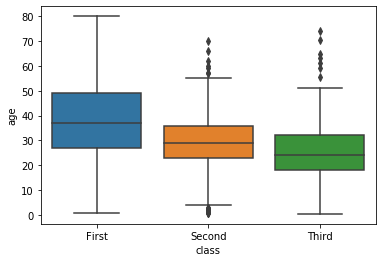

In [7]:
sns.boxplot(x ='class', y = 'age',data = titanic)
### First Class = 37, Second Class = 28, Third Class = 24

In [8]:
titanic['pasclass'] = titanic['class']

In [9]:
def input_age(cols):
    age = cols[0]
    pasclass = cols[1]
    
    if pd.isnull(age):
        if pasclass ==1:
            return 37
        elif pasclass ==2:
            return 28
        else:
            return 24
    else:
        return age

In [10]:
titanic['age'] = titanic[['age','pasclass']].apply(input_age,axis = 1)

In [11]:
sex = {'male':0,'female':1}
titanic['sex'] = titanic['sex'].map(sex)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pasclass
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third


In [12]:
embarked = {'S':0,'C':1,'Q':2}
titanic['embarked'] = titanic['embarked'].map(embarked)

In [13]:
adult_male = {True:0,False:1}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pasclass
0,0,3,0,22.0,1,0,7.2500,0.0,Third,man,0,NaN,Southampton,no,False,Third
1,1,1,1,38.0,1,0,71.2833,1.0,First,woman,1,C,Cherbourg,yes,False,First
2,1,3,1,26.0,0,0,7.9250,0.0,Third,woman,1,NaN,Southampton,yes,True,Third
3,1,1,1,35.0,1,0,53.1000,0.0,First,woman,1,C,Southampton,yes,False,First
4,0,3,0,35.0,0,0,8.0500,0.0,Third,man,0,NaN,Southampton,no,True,Third


In [15]:
titanic.corr().fare

survived      0.257307
pclass       -0.549500
sex           0.182333
age           0.107554
sibsp         0.159651
parch         0.216225
fare          1.000000
embarked      0.063462
adult_male    0.182024
alone        -0.271832
Name: fare, dtype: float64

Here the most related variables with fare are pclass, alone , survived and parch.

In [16]:
y=titanic.fare

In [17]:
X=titanic[["pclass",'alone',"parch"]]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
model=LinearRegression()

In [21]:
train_fit=model.fit(X_train,y_train)

In [22]:
train_fit.coef_

array([-33.4542095 ,  -9.74835658,  11.32062145])

In [23]:
train_fit.intercept_

111.70709266392115

the equation becomes
y= -33.05x1 -10.03x2 +  9.68x3 + 111.70
where x1,x2,x3 are pclass, alone and parch respectively.

In [24]:
pred=train_fit.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,pred)

0.37379278675912553

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
train_fit=model.fit(X_train,y_train)
pred=train_fit.predict(X_test)
r2_score(y_test,pred)

0.42407676194675725

In [32]:
def predmod(X,y,t_size):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=t_size)
    model= LinearRegression()
    model_fit=model.fit(X_train,y_train)
    
    coeff=model_fit.coef_
    inter=model_fit.intercept_
    pred=train_fit.predict(X_test)
    acc=r2_score(y_test,pred)
    acc=acc*100
    D={"coefficient":coeff,"Intercept":inter,"Accuracy":acc}
    
    return D
    

In [33]:
X1=titanic[["pclass","survived","parch"]]

In [56]:
predmod(X1,y,0.3)

{'coefficient': array([-31.83828898,   8.56865051,  11.60188932]),
 'Intercept': 98.01827292181433,
 'Accuracy': 43.26392256060665}

In [43]:
df3=titanic.drop("deck",axis=1)

In [44]:
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,pasclass
0,0,3,0,22.0,1,0,7.2500,0.0,Third,man,0,Southampton,no,False,Third
1,1,1,1,38.0,1,0,71.2833,1.0,First,woman,1,Cherbourg,yes,False,First
2,1,3,1,26.0,0,0,7.9250,0.0,Third,woman,1,Southampton,yes,True,Third
3,1,1,1,35.0,1,0,53.1000,0.0,First,woman,1,Southampton,yes,False,First
4,0,3,0,35.0,0,0,8.0500,0.0,Third,man,0,Southampton,no,True,Third


In [45]:
df3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
pasclass       0
dtype: int64

In [ ]:
df3.to_excel(r'Titanic.xlsx', index = False)

In [46]:
df4=X_test

In [47]:
df4["Actual"]=y_test

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df4["Predicted"]=pred

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df4

,pclass,alone,parch,Actual,Predicted
405,2,False,0,21.0000,44.810943
114,3,True,0,14.4583,1.956535
665,2,False,0,73.5000,44.810943
56,2,True,0,10.5000,34.399555
569,3,True,0,7.8542,1.956535
461,3,True,0,8.0500,1.956535
250,3,True,0,7.2500,1.956535
16,3,False,1,29.1250,22.041348
623,3,True,0,7.8542,1.956535
630,1,True,0,30.0000,66.842574


In [ ]:
df5=titanic

In [50]:
#df5=df5.drop(["deck"],axis=1)
df6=df4.drop(["pclass","alone","parch"],axis=1)

In [51]:
df5= pd.concat([df5, df4], axis=1, sort=False)

NameError: name 'df5' is not defined

In [52]:
df5=df5[df5.Predicted.isnull()==False]

NameError: name 'df5' is not defined

In [ ]:
df5.to_excel(r"Fare_pred.xlsx",index=False)